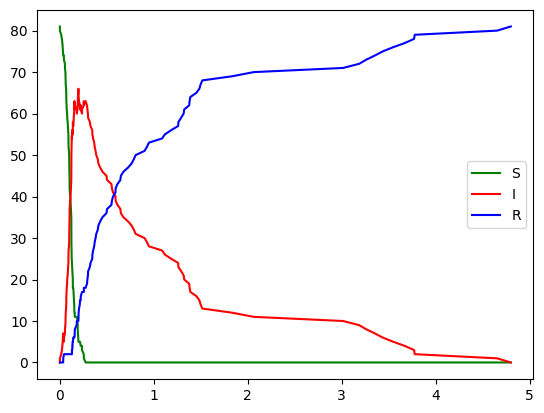

In [9]:


import networkx as nx
import numpy as np

#G = nx.Graph()
#G.add_nodes_from((0,1,2,3,4))
#G.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,0),(0,2),(0,3),(1,3),(1,4),(2,4)])
#nx.draw(G)

#d = 3
#n = 1000
#G = nx.random_regular_graph(d,n)

d = 3
G = nx.sudoku_graph(d)


dic = nx.convert.to_dict_of_dicts(G)
sordic = sorted(dic.keys())
amatrix = {}
for i in sordic:
    amatrix.update({i:dic[i]})
amatrix


τ = 2
γ = 1

initial_infecteds = [3]

tmax = 100

times = [0]
S = [len(G.nodes)]
I = [0]
R = [0]

Q = []

for i in amatrix:
    amatrix[i]['status'] = 'suscetible'
    amatrix[i]['pred_inf_time'] = np.inf    
    amatrix[i]['rec_time'] = np.inf

for j in initial_infecteds:
    event = {'node':j, 'time':0, 'action':'transmit'}
    amatrix[j]['pred_inf_time'] = 0
    Q.append(event)

while len(Q) != 0:
            
    Event = Q[0]
    for i in range(1,len(Q)):
        if Q[i]['time'] < Event['time']:
            Event = Q[i]
    Q.remove(Event)
    
    
    if Event['action'] == 'transmit':
        
        if amatrix[Event['node']]['status'] == 'suscetible':
            
            u = Event['node']
            t = Event['time']
            
            times.append(t)

            S.append(S[-1]-1)
            I.append(I[-1]+1)
            R.append(R[-1])

            amatrix[u]['status'] = 'infected'
            amatrix[u]['rec_time'] = t + np.random.exponential(1/γ)
            
            if amatrix[u]['rec_time'] < tmax:
                newEvent = {'node':u, 'time':amatrix[u]['rec_time'], 'action':'recover'}
                Q.append(newEvent)

            for v in list(amatrix[u])[:-3]:
                
                if amatrix[v]['status'] == 'suscetible':

                    inf_time = t + np.random.exponential(1/τ)

                    mínimo = min([amatrix[u]['rec_time'], tmax, amatrix[v]['pred_inf_time']])

                    if inf_time < mínimo:
                        newEvent = {'node':v, 'time':inf_time, 'action': 'transmit'}
                        Q.append(newEvent)
                        amatrix[v]['pred_inf_time'] = inf_time
        
        
    else:
        
        t = amatrix[Event['node']]['rec_time']
        times.append(t)
        S.append(S[-1])
        I.append(I[-1]-1)
        R.append(R[-1]+1)
        amatrix[Event['node']]['status'] = 'recovered'


import matplotlib.pyplot as plt

plt.plot(times,S,color='g',label='S')
plt.plot(times,I,color='r',label='I')
plt.plot(times,R,color='b',label='R')
#plt.title(f'Random Regular Graph: d = {d}, n = {n}')
plt.legend()


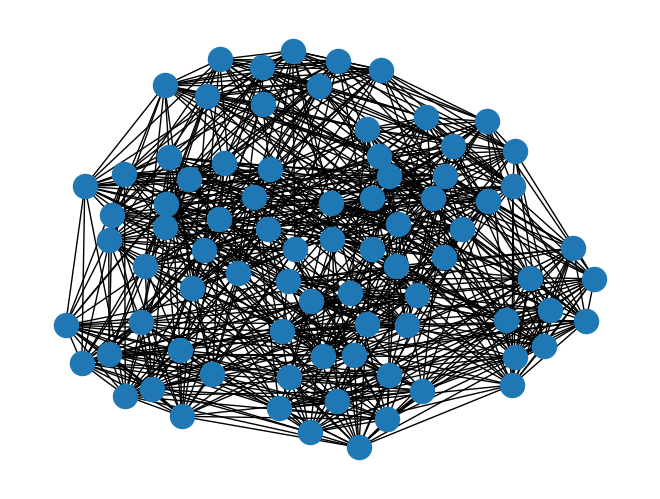

In [10]:
nx.draw(G)